# コミュニティ発見

In [1]:
import numpy as np
import networkx as nx

%matplotlib inline

In [2]:
DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 600,
    'font_size': 14,
    'font_family': 'Arial',
}

---

## クイズ

### Q1. 空手クラブを2派閥に分ける

以下のグラフ$G_{karate}$は，ある大学の空手クラブに所属する人物をノード，人物間の交友関係をエッジとして表現したものである（[参考](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)）．
この空手クラブでは，インストラクター（Mr. Hi）（ノード0）とクラブ会長（ノード33）の仲が悪く，空手クラブの所属者はインストラクター派閥と会長派閥に別れている．

グラフ$G_{karate}$においてエッジ媒介中心性が最大となるエッジを順次削除し，グラフの連結成分数が2になった時点でのグラフを表示しなさい．
ただし，このクイズではNetworkXの`community.girvan_newman`関数は使わないこと．

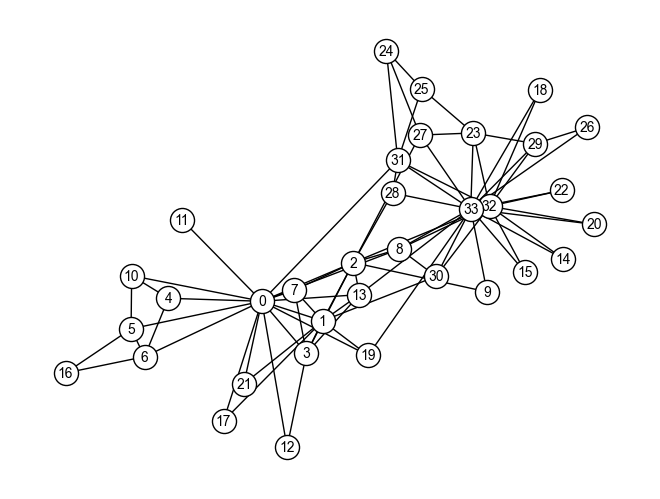

In [13]:
SECRET_KARATE_DRAW_CONFIG = {
    'node_color': 'white',
    'edgecolors': 'black', # line color of nodes
    'with_labels': True,
    'node_size': 300,
    'font_size': 10,
    'font_family': 'Arial',
}

G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate, seed=123)
nx.draw(G_karate, pos, **SECRET_KARATE_DRAW_CONFIG)

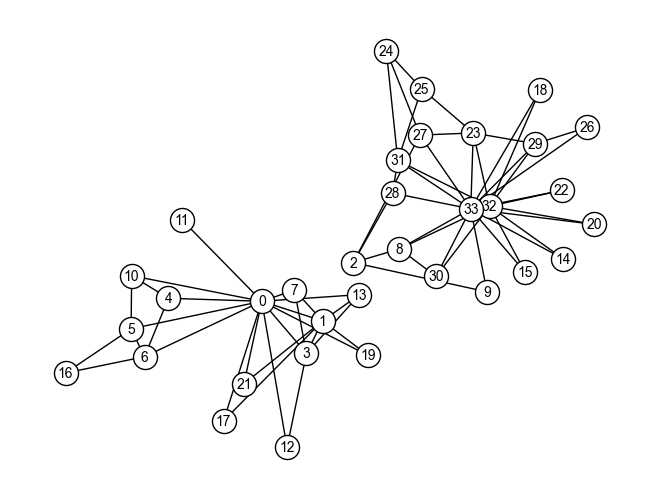

In [14]:
# グラフの定義
G_karate = nx.karate_club_graph()

# Write your codes below
while True:
    # エッジ媒介中心性を計算
    centralities = nx.edge_betweenness_centrality(G_karate)

    # エッジ媒介中心性が最大となるエッジを取得
    edge, best_centrality = sorted(centralities.items(), key=lambda x: -x[1])[0]
    
    # 対象エッジを削除
    G_karate.remove_edge(edge[0], edge[1])

    # 連結成分数が2ならエッジ削除を停止
    components = list(nx.connected_components(G_karate))
    if len(components) == 2:
        break

# 分割状態を可視化
nx.draw(G_karate, pos, **SECRET_KARATE_DRAW_CONFIG)

### Q2. Girvan-Newmanアルゴリズムとモジュラリティ

Q1で用いたグラフ$G_{karate}$にGirvan-Newmanアルゴリズムを適応し，分割できなくなるまでグラフをコミュニティに分割しなさい．
また，コミュニティ分割をする度にグラフのモジュラリティを計算し，モジュラリティの変化値を観察しなさい．
さらに，モジュラリティが最大となるコミュニティ分割の結果を示しなさい．

In [15]:
# グラフの定義
G_karate = nx.karate_club_graph()

# Write your codes below
for i, communities in enumerate(nx.community.girvan_newman(G_karate)):
    print(f"{i+1}回目のコミュニティ分割\t", nx.community.modularity(G_karate, communities))

1回目のコミュニティ分割	 0.3476602762317048
2回目のコミュニティ分割	 0.3423192968647514
3回目のコミュニティ分割	 0.3580611307884035
4回目のコミュニティ分割	 0.3849721706864564
5回目のコミュニティ分割	 0.37578006409175235
6回目のコミュニティ分割	 0.3594760218136841
7回目のコミュニティ分割	 0.3470699574595678
8回目のコミュニティ分割	 0.33324900208017094
9回目のコミュニティ分割	 0.31344052772624204
10回目のコミュニティ分割	 0.3122598901819681
11回目のコミュニティ分割	 0.30368621277712193
12回目のコミュニティ分割	 0.29429733325837226
13回目のコミュニティ分割	 0.28271584115739956
14回目のコミュニティ分割	 0.27116245947414774
15回目のコミュニティ分割	 0.2544648713479881
16回目のコミュニティ分割	 0.23975375274076566
17回目のコミュニティ分割	 0.2268979217031164
18回目のコミュニティ分割	 0.22299057363992417
19回目のコミュニティ分割	 0.20056783043796028
20回目のコミュニティ分割	 0.18696238826108952
21回目のコミュニティ分割	 0.1609134011731414
22回目のコミュニティ分割	 0.1428102921609415
23回目のコミュニティ分割	 0.11768894885778003
24回目のコミュニティ分割	 0.11088622776934465
25回目のコミュニティ分割	 0.10076647738985402
26回目のコミュニティ分割	 0.08837915331421826
27回目のコミュニティ分割	 0.0562395757200952
28回目のコミュニティ分割	 0.04398343359382321
29回目のコミュニティ分割	 0.011515901126290735
30回目の

モジュラリティが最大となるコミュニティ分割
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})


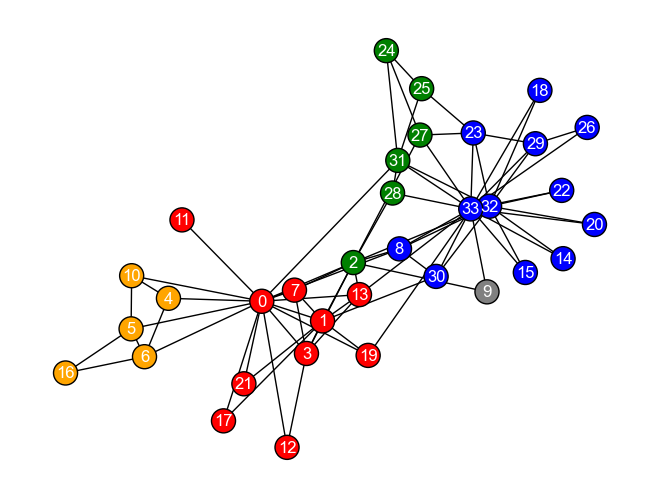

In [16]:
for i, communities in enumerate(nx.community.girvan_newman(G_karate)):
    if i+1 == 4:
        optimal_communities = communities
        break
  
print("モジュラリティが最大となるコミュニティ分割")
print(optimal_communities)

# 所属コミュニティによってノードを色分けする
node_colors = []
for node in G_karate.nodes():
    if node in optimal_communities[0]:
        node_colors.append('red')
    elif node in optimal_communities[1]:
        node_colors.append('green')
    elif node in optimal_communities[2]:
        node_colors.append('orange')
    elif node in optimal_communities[3]:
        node_colors.append('blue')
    else:
        node_colors.append('gray')

# コミュニティ分割結果の可視化
KARATE_DRAW_CONFIG = {
    'edgecolors': 'black',
    'with_labels': True,
    'node_size': 300,
    'font_size': 12,
    'font_color': 'white',
    'font_family': 'Arial',
}

nx.draw(G_karate, pos, **KARATE_DRAW_CONFIG, node_color=node_colors)

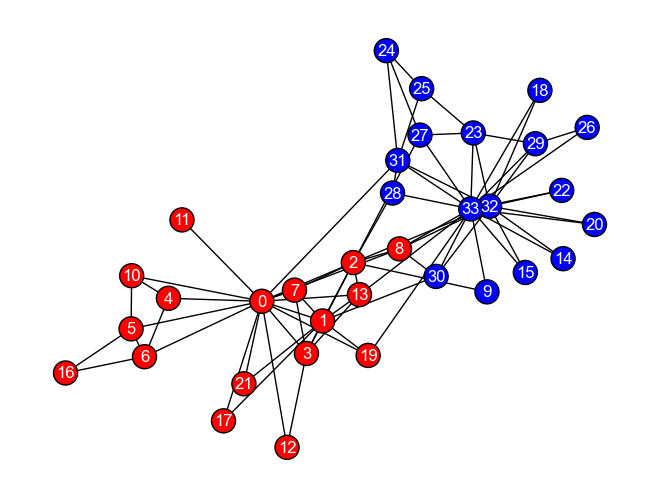

In [17]:
KARATE_DRAW_CONFIG = {
    'edgecolors': 'black',
    'with_labels': True,
    'node_size': 300,
    'font_size': 12,
    'font_color': 'white',
    'font_family': 'Arial',
}

G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate, seed=123)

node_colors = ['red' if G_karate.nodes[n]['club'] == 'Mr. Hi' else 'blue' for n in G_karate.nodes()]
nx.draw(G_karate, pos, **KARATE_DRAW_CONFIG, node_color=node_colors)